In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

main_data = pd.read_csv("mxmh_survey_results.csv").dropna()

# This code mainly maps strings to numbers so things are easier to work with, along with cleaning up columns that are unnecessary
replacement_nums = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3, "No": 0, "Yes": 1, "No effect": 0, "Improve": 1}
main_data = main_data.replace(replacement_nums)
main_data.drop(["Timestamp", "Permissions"], axis=1, inplace=True)

main_data

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,0
3,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,1
4,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,1
5,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,1
6,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,1,1,0,Rock,1,1,120.0,...,3,0,1,3,0,7.0,6.0,0.0,9.0,1
732,18.0,Spotify,1.0,1,1,0,Pop,1,1,160.0,...,3,0,0,2,2,3.0,2.0,2.0,5.0,1
733,19.0,Other streaming service,6.0,1,0,1,Rap,1,0,120.0,...,2,2,2,1,1,2.0,2.0,2.0,2.0,1
734,19.0,Spotify,5.0,1,1,0,Classical,0,0,170.0,...,0,0,0,0,2,2.0,3.0,2.0,1.0,1


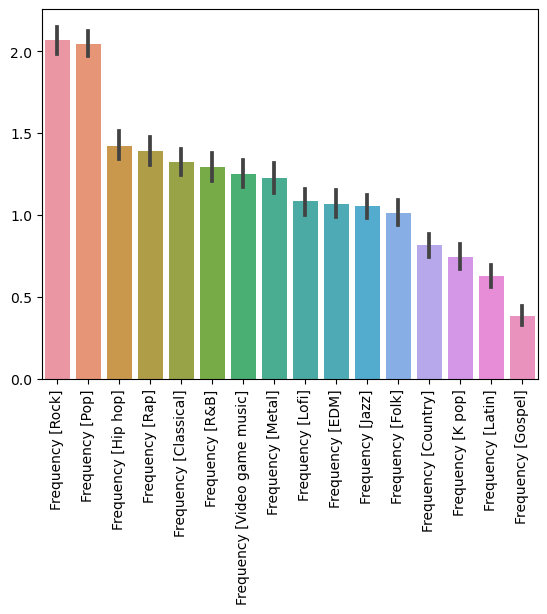

In [3]:
# Question 1: What music genres are the most popular?

genre_data = main_data.filter(like='Frequency')
sum_of_genre_data = genre_data.sum()
sorted_columns = sum_of_genre_data.sort_values(ascending=False)
sum_of_genre_data = sum_of_genre_data[sorted_columns.index]

# Our top 3 genres are here, along with the plot
top_three_genres = sum_of_genre_data.head(3)
seaborn.barplot(genre_data[sorted_columns.index])
plt.xticks(rotation='vertical')
plt.show()

### The top 3 most popular genres in this dataset were Rock, Pop, and Hip hop.

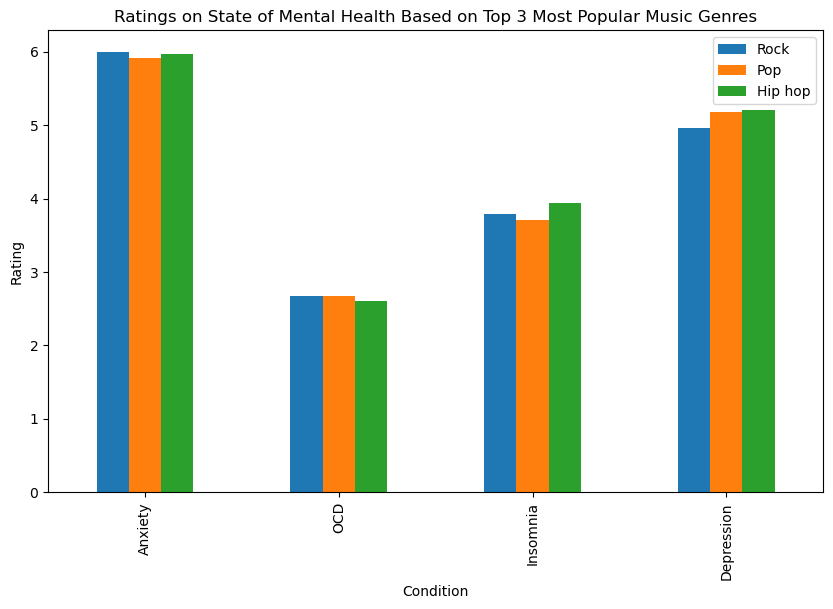

In [4]:
# Question 2: From these most popular music genres, what is the general state of their mental health?


# I would say that to like a genre, you would give it at least a 2, so this code looks at people who said 2 or higher for each of these 3 genres

# This gets the mental health condition values for each of the 3 most popular genres
mental_health_rock = main_data[(main_data["Frequency [Rock]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()
mental_health_pop = main_data[(main_data["Frequency [Pop]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()
mental_health_hip_hop = main_data[(main_data["Frequency [Hip hop]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()

# This combines all of them and renames the columns to something more logical than 0, 1, and 2
popular_genre_mental_health_df = pd.concat([mental_health_pop, mental_health_hip_hop, mental_health_rock], axis=1)
popular_genre_mental_health_df.rename(columns = {0: "Rock", 1: "Pop", 2: "Hip hop"}, inplace = True)

# This makes our barplot comparing each of them
popular_genre_barplot = popular_genre_mental_health_df.plot(kind="bar", figsize=(10, 6))
popular_genre_barplot.set_ylabel("Rating") 
popular_genre_barplot.set_xlabel("Condition")  
popular_genre_barplot.set_title("Ratings on State of Mental Health Based on Top 3 Most Popular Music Genres")  

plt.show()


### It appears that people from these 3 genres all have roughly the same mental health conditions. The slight variation I would assume is just due to the nature of data, rather than any actual associaion between genres.


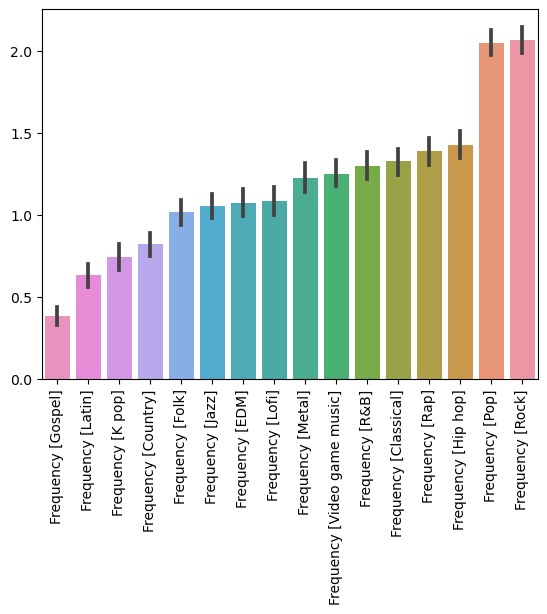

In [5]:
# Question 3: What music genres are the least popular?

# Our bottom 3 genres are here, with plot of course
top_three_genres = sum_of_genre_data.tail(3)
seaborn.barplot(genre_data[sorted_columns.index])
plt.xticks(rotation='vertical')
plt.gca().invert_xaxis()
plt.show()

### Our 3 least popular genres are Gospel, Latin, and K-pop

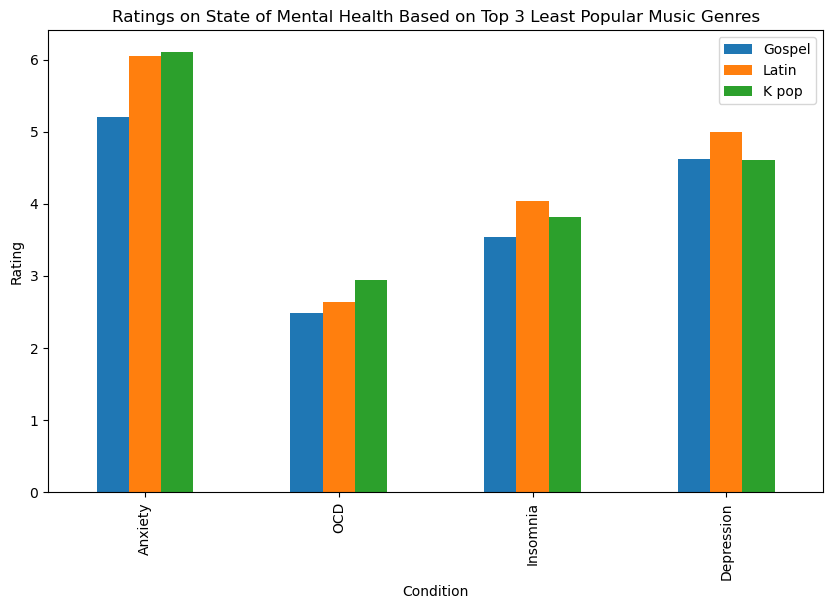

In [6]:
# Question 4: From these least popular music genres, what is the general state of their mental health?

# This gets the mental health condition values for each of the 3 most least popular genres
mental_health_gospel = main_data[(main_data["Frequency [Gospel]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()
mental_health_latin = main_data[(main_data["Frequency [Latin]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()
mental_health_k_pop = main_data[(main_data["Frequency [K pop]"] >= 2)].filter(items=["Anxiety", "OCD", "Insomnia", "Depression"]).mean()

# This combines all of them and renames the columns to something more logical than 0, 1, and 2
least_popular_genre_mental_health_df = pd.concat([mental_health_gospel, mental_health_latin, mental_health_k_pop], axis=1)
least_popular_genre_mental_health_df.rename(columns = {0: "Gospel", 1: "Latin", 2: "K pop"}, inplace = True)

# This makes our barplot comparing each of them
least_popular_genre_barplot = least_popular_genre_mental_health_df.plot(kind="bar", figsize=(10, 6))
least_popular_genre_barplot.set_ylabel("Rating") 
least_popular_genre_barplot.set_xlabel("Condition")  
least_popular_genre_barplot.set_title("Ratings on State of Mental Health Based on Top 3 Least Popular Music Genres")  

plt.show()

### Our results appear a bit more varied, though that just may be due to variance and a smaller sample size. however, there does appear to be an assocation between lower anxiety between those who listen to Gospel versus the other 2 genres, Latin and K pop, based on the graph. K pop also appears to have the highest rating of OCD, though not much higher than the other 2 genres.

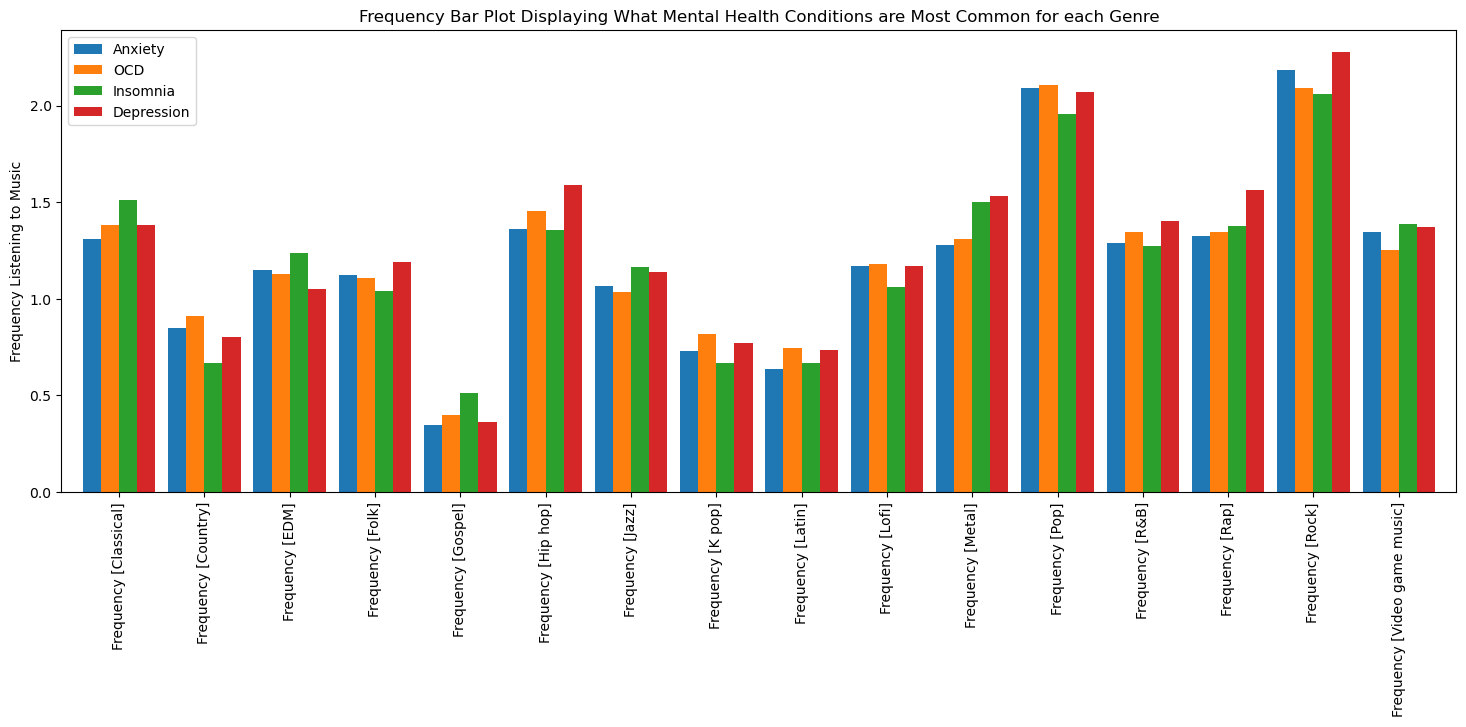

{'Frequency [Classical]': 'Insomnia', 'Frequency [Country]': 'OCD', 'Frequency [EDM]': 'Insomnia', 'Frequency [Folk]': 'Depression', 'Frequency [Gospel]': 'Insomnia', 'Frequency [Hip hop]': 'Depression', 'Frequency [Jazz]': 'Insomnia', 'Frequency [K pop]': 'OCD', 'Frequency [Latin]': 'OCD', 'Frequency [Lofi]': 'OCD', 'Frequency [Metal]': 'Depression', 'Frequency [Pop]': 'OCD', 'Frequency [R&B]': 'Depression', 'Frequency [Rap]': 'Depression', 'Frequency [Rock]': 'Depression', 'Frequency [Video game music]': 'Insomnia'}


,Anxiety,OCD,Insomnia,Depression
Frequency [Classical],1.311881,1.381818,1.510417,1.379562
Frequency [Country],0.851485,0.909091,0.666667,0.802920
Frequency [EDM],1.148515,1.127273,1.239583,1.051095
Frequency [Folk],1.123762,1.109091,1.041667,1.189781
Frequency [Gospel],0.346535,0.400000,0.510417,0.364964
Frequency [Hip hop],1.361386,1.454545,1.354167,1.591241
Frequency [Jazz],1.064356,1.036364,1.166667,1.138686
Frequency [K pop],0.727723,0.818182,0.666667,0.773723
Frequency [Latin],0.638614,0.745455,0.666667,0.737226
Frequency [Lofi],1.168317,1.181818,1.062500,1.167883


In [7]:
# Question 5: What is generally the most common mental health condition for each genre of music?

# I would say a high rating for a mental health condition is anything above a 7, and the code below gets each of those conditions, and the music genre frequencies for each

anxiety_df = main_data[(main_data["Anxiety"] > 7)].filter(like="Frequency").mean()
ocd_df = main_data[(main_data["OCD"] > 7)].filter(like="Frequency").mean()
insomnia_df = main_data[(main_data["Insomnia"] > 7)].filter(like="Frequency").mean()
depression_df = main_data[(main_data["Depression"] > 7)].filter(like="Frequency").mean()

# This compiles all 4 of those dataframes above into one big dataframe for making a plot and analysis

mental_health_total_df = pd.concat([anxiety_df, ocd_df, insomnia_df, depression_df], axis=1)
mental_health_total_df.rename(columns = {0: "Anxiety", 1: "OCD", 2: "Insomnia", 3: "Depression"}, inplace = True)

# This code will automatically find the most common mental health condition from each genre of music, and put them in a dictionary

most_common_mental_health_condition = {}

for index, row in mental_health_total_df.iterrows():
    most_popular_genre = row.idxmax()
    most_common_mental_health_condition[index] = most_popular_genre

mental_health_barplot = mental_health_total_df.plot(kind = "bar", figsize = (18, 6), width = 0.85)
mental_health_barplot.set_ylabel("Frequency Listening to Music")
mental_health_barplot.set_title("Frequency Bar Plot Displaying What Mental Health Conditions are Most Common for each Genre")

plt.show()

print(most_common_mental_health_condition)
mental_health_total_df

### Here is our plot above, and here are the results for the most common mental heatlh condition for each genre of music:
    Classical: Insomnia
    Country: OCD
    EDM: Insomnia
    Folk: Depression
    Gospel: Insomnia
    Hip hop: Depression
    Jazz: Insomnia
    K pop: OCD
    Latin: OCD
    Lofi: OCD
    Metal: Depression
    Pop: OCD
    R&B: Depression
    Rap: Depression
    Rock: Depression
    Video game music: Insomnia    

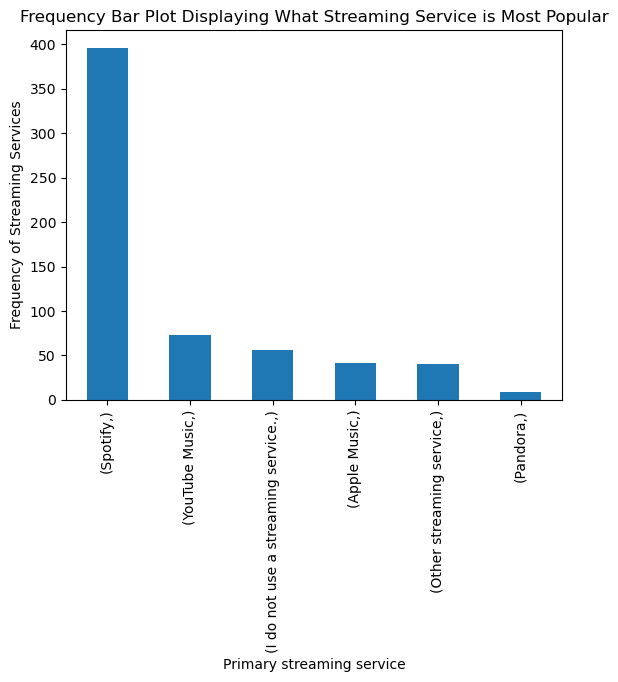

In [8]:
# Question 6: What streaming service is the most popular for listening to music?

# Simply just gets the streaming services only and finds which one is the most popular.
streaming_service_df = main_data.filter(like="streaming")
most_popular_streaming_service = streaming_service_df.value_counts().idxmax()

# Visualization here
streaming_service_barplot_popularity = streaming_service_df.value_counts().plot(kind = "bar")
streaming_service_barplot_popularity.set_ylabel("Frequency of Streaming Services")
streaming_service_barplot_popularity.set_title("Frequency Bar Plot Displaying What Streaming Service is Most Popular")

plt.show()

### Our most popular streaming service is Spotify by a long shot.

Text(0.5, 1.0, 'Frequency graph of Common Mental Health Conditions for each Streaming Service')

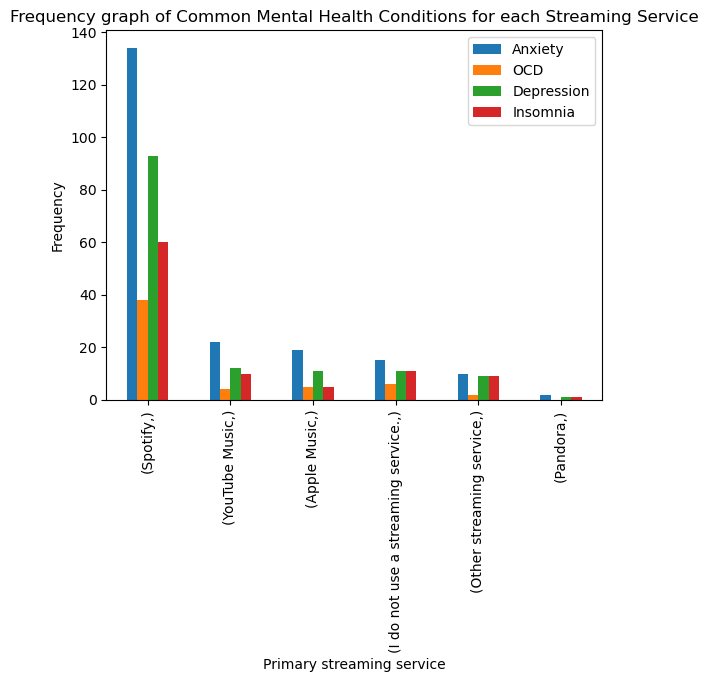

In [9]:
# Question 7: Is there any correlation between the general mental state of somebody and their most popular streaming service?

streaming_service_anxiety = main_data[(main_data["Anxiety"] > 7)].filter(like="streaming").value_counts()
streaming_service_ocd = main_data[(main_data["OCD"] > 7)].filter(like="streaming").value_counts()
streaming_service_depression = main_data[(main_data["Depression"] > 7)].filter(like="streaming").value_counts()
streaming_service_insomnia = main_data[(main_data["Insomnia"] > 7)].filter(like="streaming").value_counts()

streaming_service_mental_state = pd.concat([streaming_service_anxiety, streaming_service_ocd, streaming_service_depression, streaming_service_insomnia], axis=1)
streaming_service_mental_state.rename(columns = {0: "Anxiety", 1: "OCD", 2: "Depression", 3: "Insomnia"}, inplace = True)

streaming_service_mental_state_barplot = streaming_service_mental_state.plot(kind="bar")
streaming_service_mental_state_barplot.set_ylabel("Frequency")
streaming_service_mental_state_barplot.set_title("Frequency graph of Common Mental Health Conditions for each Streaming Service")



### There generally doesn't seem to be much correlation between streaming service and mental health condition. Thought there would be some more interesting results but there appears to be no correlation out of just the general correlation of each streaming service.

In [10]:
# Question 8: What mental states are most improved by listening to music?

improve_anxiety_df = main_data[(main_data["Anxiety"] > 7)].filter(like="Music effects").mean()
improve_ocd_df = main_data[(main_data["OCD"] > 7)].filter(like="Music effects").mean()
improve_insomnia_df = main_data[(main_data["Insomnia"] > 7)].filter(like="Music effects").mean()
improve_depression_df = main_data[(main_data["Depression"] > 7)].filter(like="Music effects").mean()

improve_mental_state_df = pd.concat([improve_anxiety_df, improve_ocd_df, improve_insomnia_df, improve_depression_df], axis=0)
improve_mental_state_df.rename(columns = {0: "Anxiety", 1: "OCD", 2: "Insomnia", 3: "Depression"}, inplace = True)

improve_mental_state_barplot = improve_mental_state_df.plot(kind="bar")
improve_mental_state_barplot

/tmp/ipykernel_20313/1608350958.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  improve_anxiety_df = main_data[(main_data["Anxiety"] > 7)].filter(like="Music effects").mean()
/tmp/ipykernel_20313/1608350958.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  improve_ocd_df = main_data[(main_data["OCD"] > 7)].filter(like="Music effects").mean()
/tmp/ipykernel_20313/1608350958.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specif

TypeError: Series.rename() got an unexpected keyword argument 'columns'

### It seems that people who have OCD are the ones who most often say that music helps with their mental condition, but it does generally seem the same for each condition.

<Axes: >

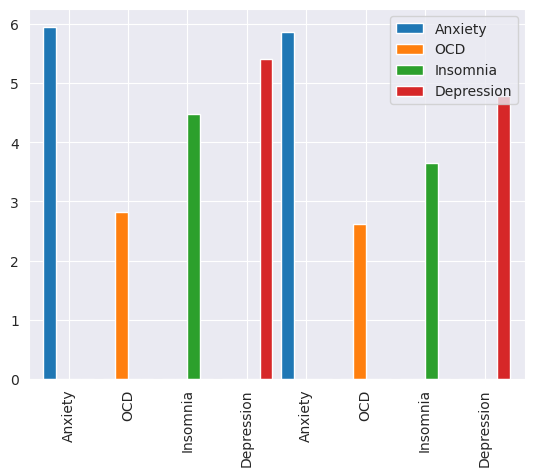

In [ ]:
# Question 9: What associations are there between being a composer and their state of mental health?

composer_anxiety = main_data[(main_data["Composer"] == 1)].filter(like="Anxiety").mean()
composer_ocd = main_data[(main_data["Composer"] == 1)].filter(like="OCD").mean()
composer_insomnia = main_data[(main_data["Composer"] == 1)].filter(like="Insomnia").mean()
composer_depression = main_data[(main_data["Composer"] == 1)].filter(like="Depression").mean()

not_composer_anxiety = main_data[(main_data["Composer"] == 0)].filter(like="Anxiety").mean()
not_composer_ocd = main_data[(main_data["Composer"] == 0)].filter(like="OCD").mean()
not_composer_insomnia = main_data[(main_data["Composer"] == 0)].filter(like="Insomnia").mean()
not_composer_depression = main_data[(main_data["Composer"] == 0)].filter(like="Depression").mean()

composer_mental_state_df = pd.concat([composer_anxiety, composer_ocd, composer_insomnia, composer_depression], axis=1)
not_composer_mental_state_df = pd.concat([not_composer_anxiety, not_composer_ocd, not_composer_insomnia, not_composer_depression], axis=1)

overall_mental_state_composer_df = pd.concat([composer_mental_state_df, not_composer_mental_state_df])
overall_mental_state_composer_df.rename(columns = {0: "Anxiety", 1: "OCD", 2: "Insomnia", 3: "Depression"}, inplace = True)

overall_mental_state_composer_df.plot(kind="bar", width=0.85)

### There doesn't appear to be too much correlation, other than that when you're a composer, you're more likely to have worse insomnia versus someone who isn't a composer.

Text(0.5, 1.0, 'Bar Graph of Frequency of Music Genres for each Age Group')

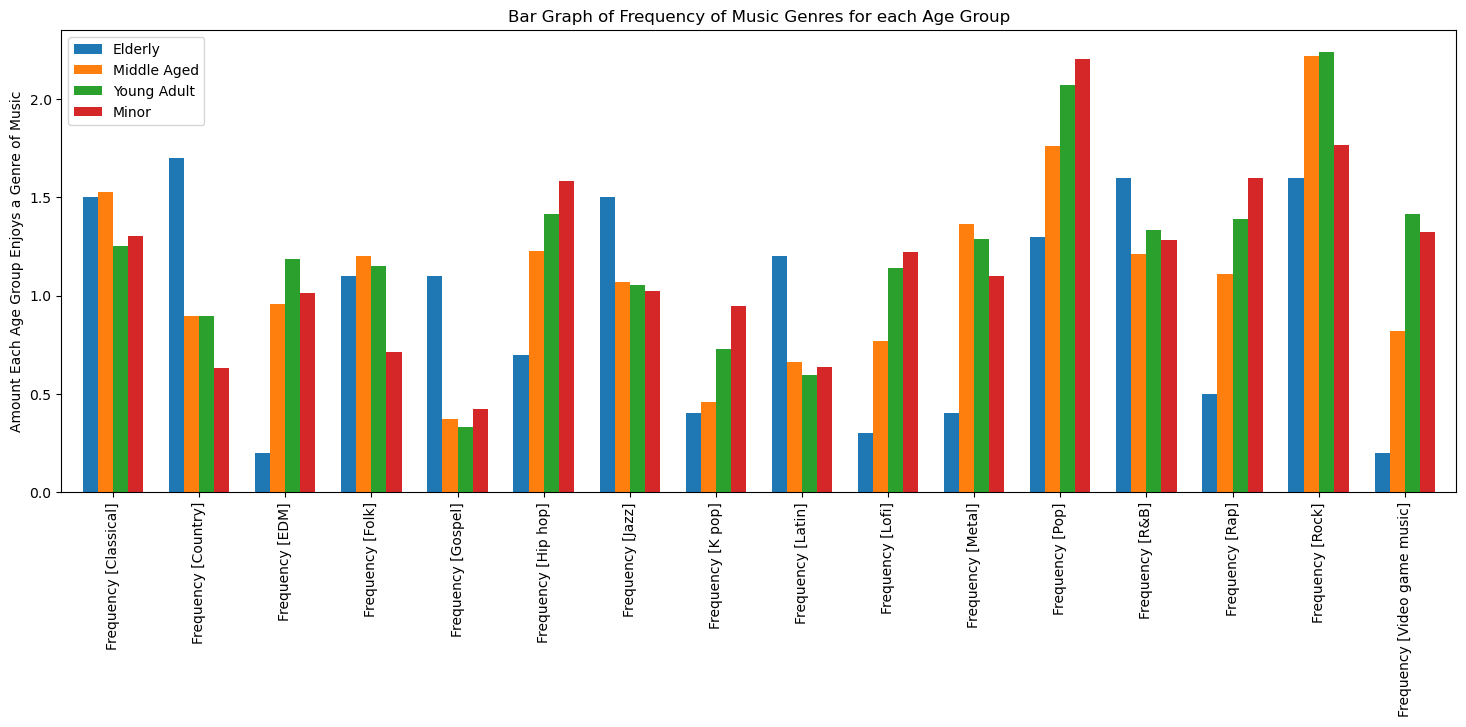

In [28]:
# Question 10: Does being someone who is older affect what types of music you like to listen to?

elderly_data = main_data[(main_data["Age"] >= 65)].filter(like="Frequency").mean()
middle_aged_data = main_data[(main_data["Age"] < 65) & (main_data["Age"] >= 30)].filter(like="Frequency").mean()
young_adult_data = main_data[(main_data["Age"] < 30) & (main_data["Age"] >= 19)].filter(like="Frequency").mean()
minor_data = main_data[(main_data["Age"] < 19)].filter(like="Frequency").mean()

all_age_data = pd.concat([elderly_data, middle_aged_data, young_adult_data, minor_data], axis=1)
all_age_data.rename(columns={0: "Elderly", 1: "Middle Aged", 2: "Young Adult", 3: "Minor"}, inplace=True)

age_bar_plot = all_age_data.plot(kind="bar", width=0.7, figsize = (18, 6))
age_bar_plot.set_ylabel("Amount Each Age Group Enjoys a Genre of Music")
age_bar_plot.set_title("Bar Graph of Frequency of Music Genres for each Age Group")

### There were actually quite a few interesting findings here. Firstly, in general, the Elderly seem to have quite different musical tastes compared to the other age groups. They like genres like Classical, Country, Gospel, Jazz, Latin, and R&B are way more popular with them. Middle-aged people and Young adults share quite a few musical tastes, such as with Rock, Folk, and Country. Minors also have quite different musical tastes as well, being into genres such as Lofi, Rap, and Pop. I found it really interesting that Pop has almost a uniform upward trajectory. 